### ANJALI MAHESHWARI
### 20BAI10198

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

##### Reading dataset

In [45]:
df = pd.read_csv('books.csv')

##### 1. How many rows and columns are there in books.csv dataset

In [46]:
print("Rows = ", len(df.index))
print("Columns = ", len(df.columns))

Rows =  399
Columns =  24


##### 2. How many books do not have an original title?

In [47]:
matching_titles_count = (df['title'].str.lower() == df['original_title'].str.lower()).sum()
print(f'The number of books with title equal to original title is: {matching_titles_count}')

The number of books with title equal to original title is: 252


##### 3. How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [48]:
# Remove rows with null values in the 'original_title' column
df_cleaned = df.dropna(subset=['original_title'])

# Count the number of unique books based on 'book_id'
unique_books_count = df_cleaned['book_id'].nunique()

print(f'The number of unique books based on book_id after removing null values in the original_title column is: {unique_books_count}')


The number of unique books based on book_id after removing null values in the original_title column is: 363


#### 4. What is the average rating of all the books in the dataset based on ‘average_rating’?

In [49]:
average_rating = df['average_rating'].mean()
print(f'The average rating of all books is: {average_rating:.2f}')

The average rating of all books is: 3.98


##### 5. Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [50]:
# Converting 'original_publication_year' to string and extracting the year
df['original_publication_year'] = df['original_publication_year'].astype(str)
df['publication_year'] = df['original_publication_year'].str.extract(r'(\d{4})')

# Count of the number of books published in the year '2000'
books_in_2000_count = (df['publication_year'] == '2000').sum()

print(f'The number of books published in the year 2000 is: {books_in_2000_count}')

The number of books published in the year 2000 is: 8


##### 6. Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [51]:
max_ratings_title = df.loc[df['work_ratings_count'].idxmax(), 'title']

print(f'The book with the maximum number of ratings is: {max_ratings_title}')

The book with the maximum number of ratings is: The Diary of a Young Girl


##### 7. Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

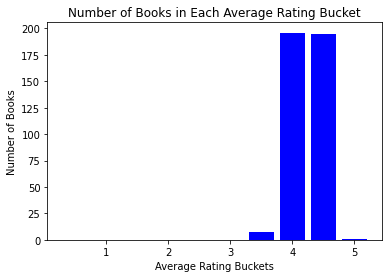

In [52]:
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = [round(x, 1) for x in bins[1:]]  # Use labels for the rounded values

df['rating_bucket'] = pd.cut(df['average_rating'], bins=bins, labels=labels, include_lowest=True)
rating_counts = df['rating_bucket'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values, width=0.4, color='blue')
plt.xlabel('Average Rating Buckets')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Average Rating Bucket')
plt.show()